#SVM Dataset Analyzes

In [1]:
#general libraray
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


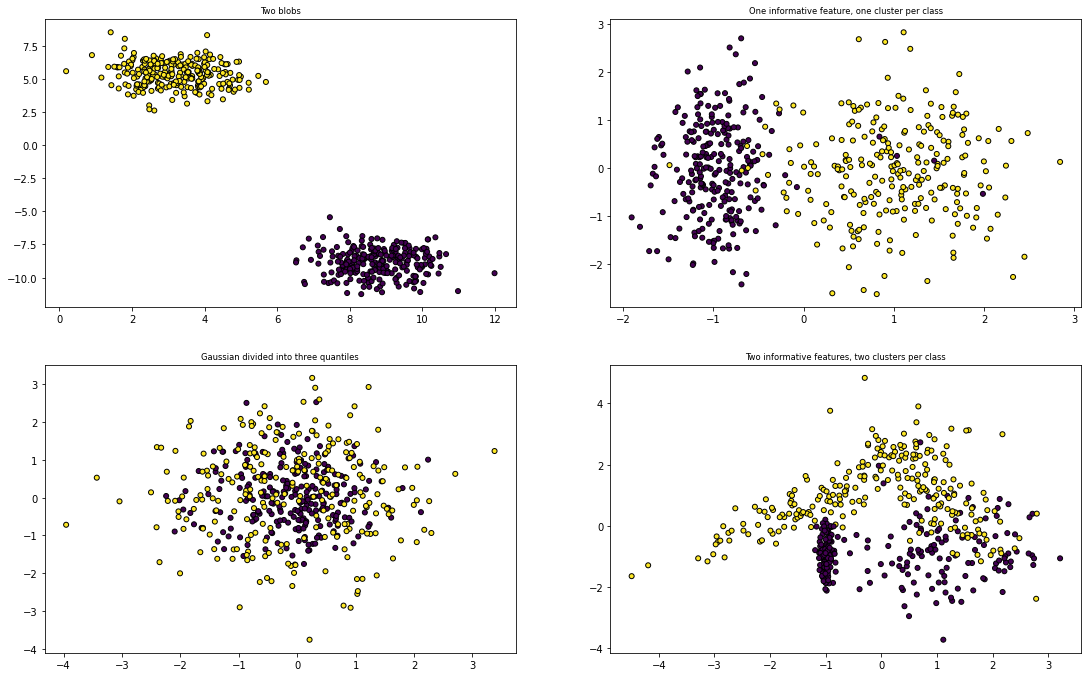

In [3]:
n_samples = 500
n_featurs = 10
shuffle = False

plt.figure(figsize=(16, 16))
plt.subplots_adjust(bottom=0.05, top=0.9, left=0.05, right=0.95)

# dataset 1
plt.subplot(321)
plt.title("Two blobs", fontsize="small")
X1, Y1 = make_blobs(n_samples= n_samples ,n_features=n_featurs, centers=2)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

# dataset 2
plt.subplot(322)
plt.title("One informative feature, one cluster per class", fontsize="small")
X2, Y2 = make_classification(n_samples= n_samples,n_features=n_featurs, n_redundant=0, n_informative=1, n_clusters_per_class=1 ,shuffle=shuffle)
plt.scatter(X2[:, 0], X2[:, 1], marker="o", c=Y2, s=25, edgecolor="k")

# # dataset 3
plt.subplot(323)
plt.title("Gaussian divided into three quantiles", fontsize="small")
X3, Y3 = make_gaussian_quantiles(n_samples= n_samples ,n_features=n_featurs, n_classes=2,shuffle=shuffle,cov=1)
plt.scatter(X3[:, 0], X3[:, 1], marker="o", c=Y3, s=25, edgecolor="k")

# # dataset 4
plt.subplot(324)
plt.title("Two informative features, two clusters per class", fontsize="small")
X4, Y4 = make_classification(n_samples= n_samples ,n_features=n_featurs, n_redundant=0, n_informative=2,shuffle=shuffle)
X4 = X4[:,:2]
plt.scatter(X4[:, 0], X4[:, 1], marker="o", c=Y4, s=25, edgecolor="k")


plt.show()

In [4]:
def separate_dataset_class(X,y,num_class=[0,1]):
  pos = []
  neg = []
  i = 0
  for label in X:
    if y[i] == num_class[0]:
      pos.append(label)
    else:
      neg.append(label)
    i+=1
  return np.array(pos),np.array(neg),

Automatically created module for IPython interactive environment
################ DataSet 1 ###################
---------------- C = 0.5------------------


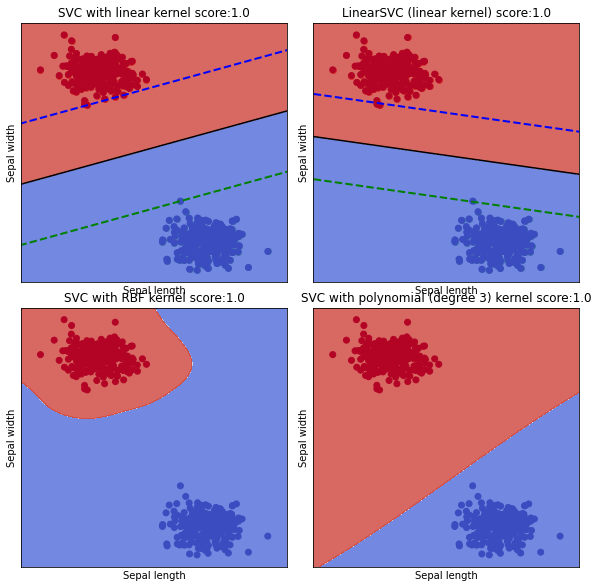

---------------- C = 1------------------


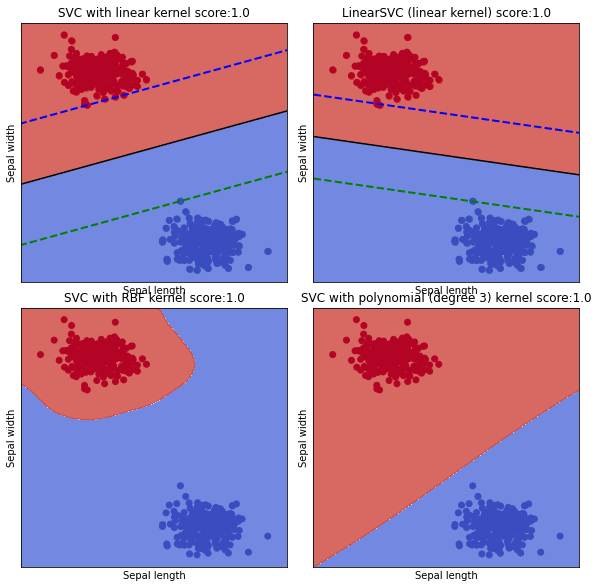

---------------- C = 5------------------


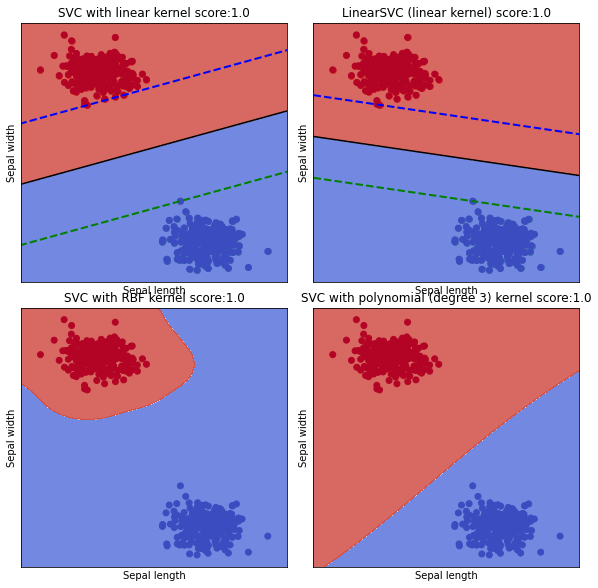

---------------- C = 10------------------


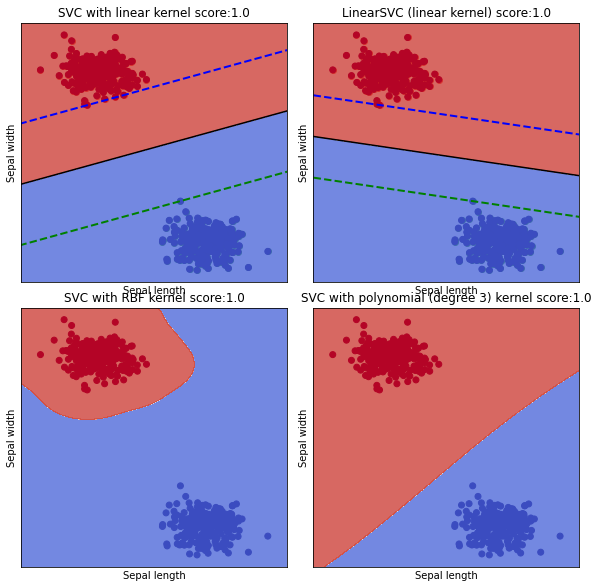

---------------- C = 20------------------


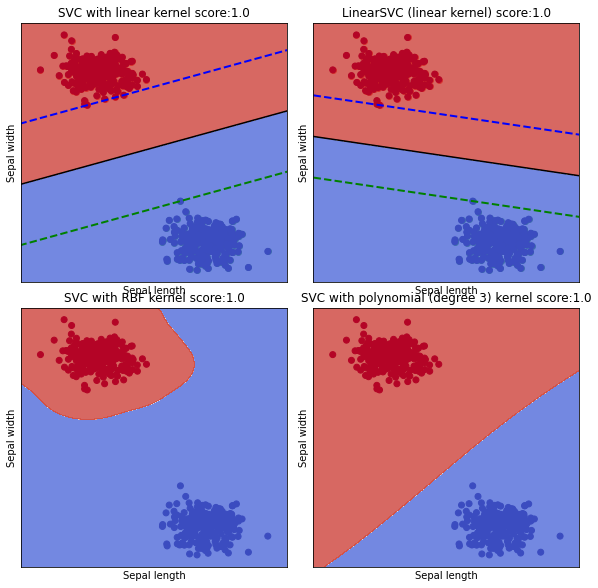

################ DataSet 2 ###################
---------------- C = 0.5------------------


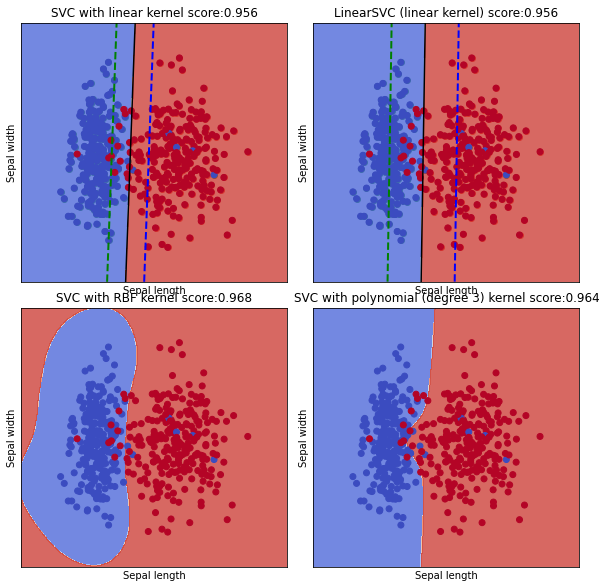

---------------- C = 1------------------


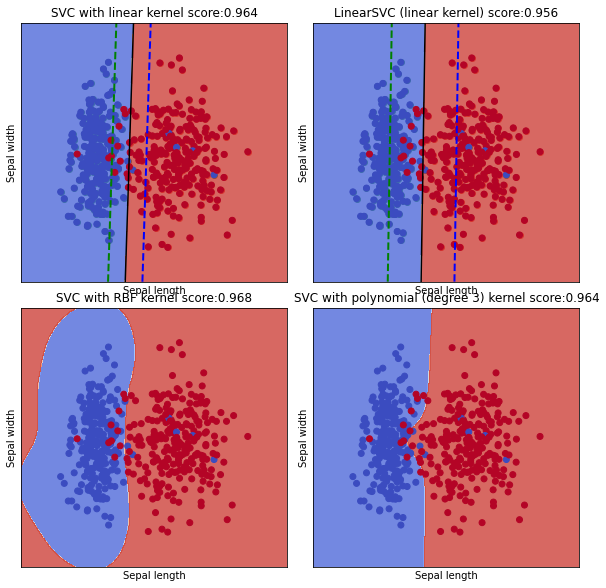

---------------- C = 5------------------


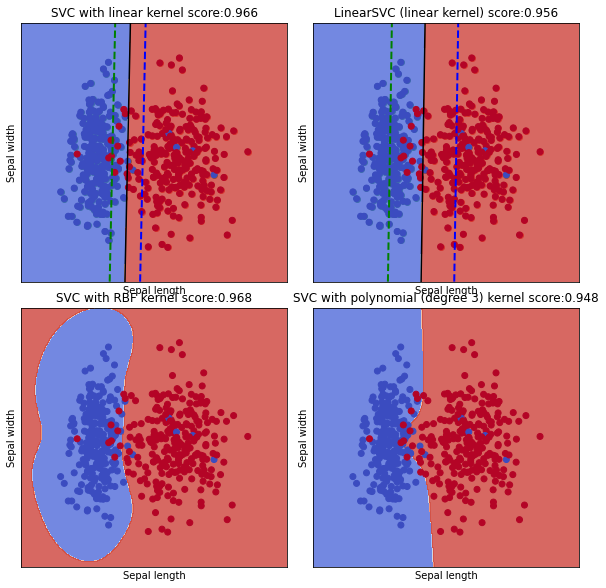

---------------- C = 10------------------


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


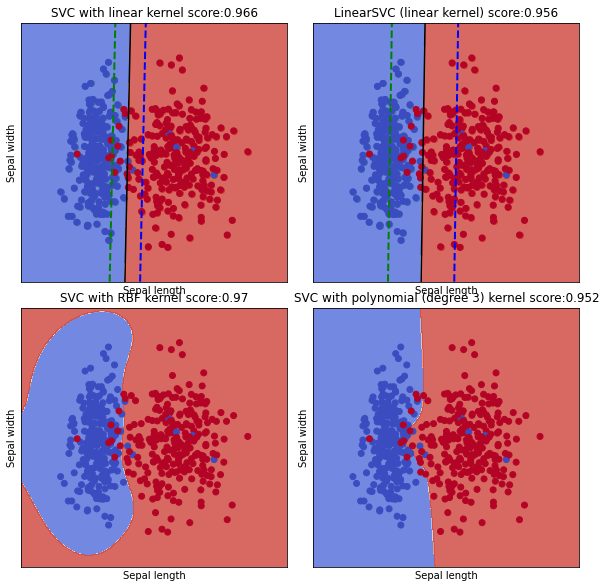

---------------- C = 20------------------


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


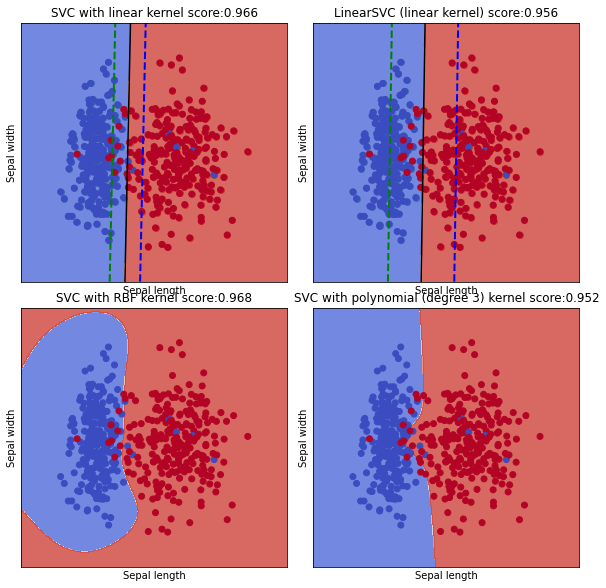

################ DataSet 3 ###################
---------------- C = 0.5------------------


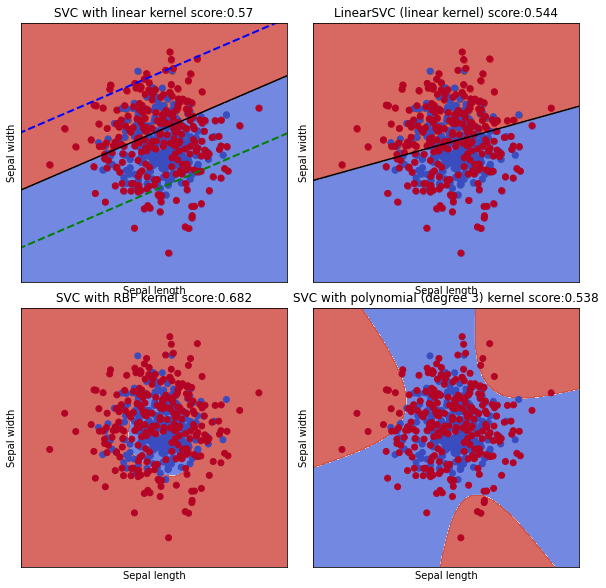

---------------- C = 1------------------


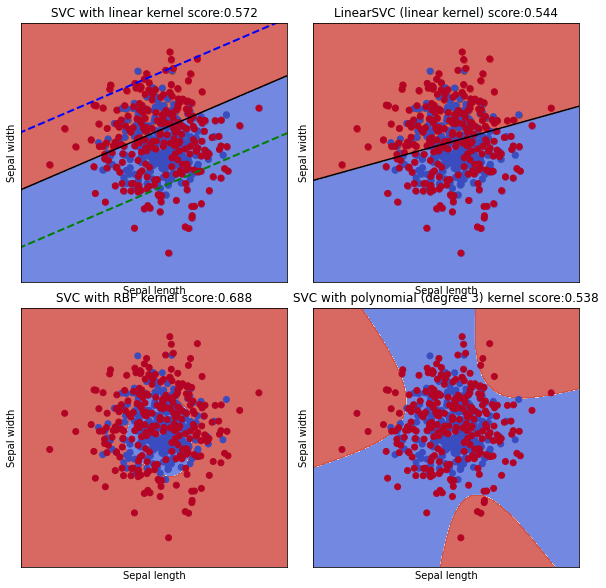

---------------- C = 5------------------


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


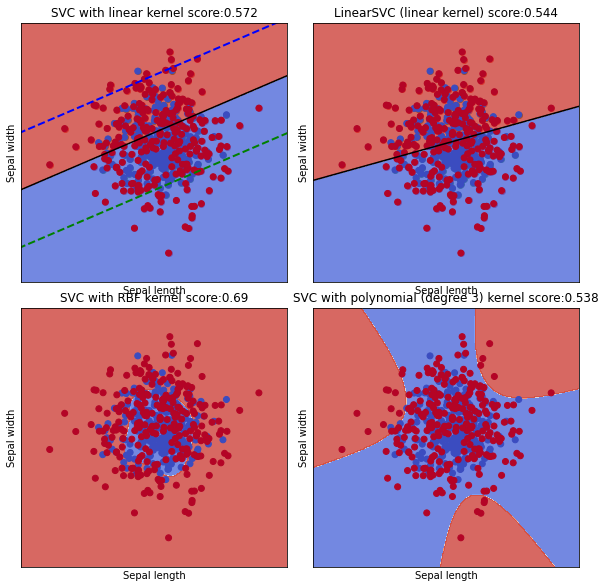

---------------- C = 10------------------


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


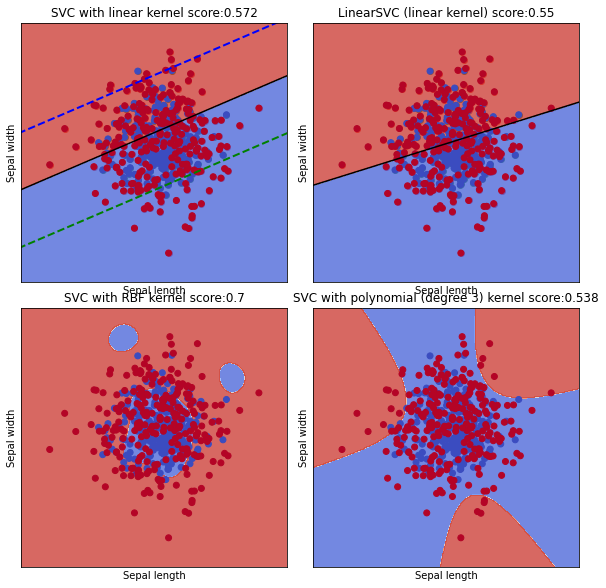

---------------- C = 20------------------


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


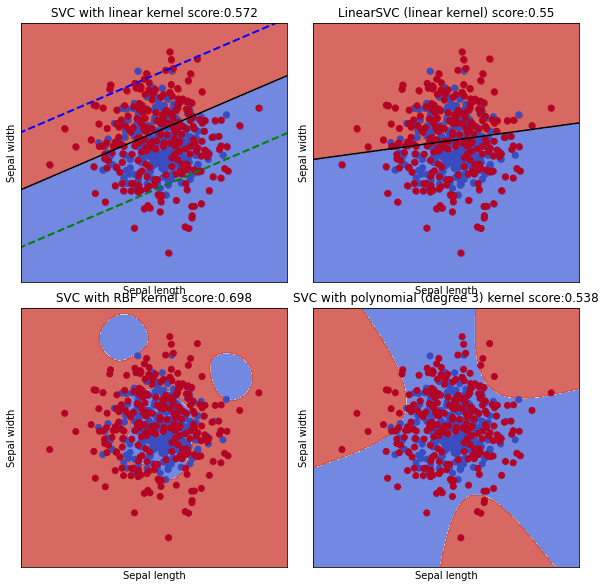

################ DataSet 4 ###################
---------------- C = 0.5------------------


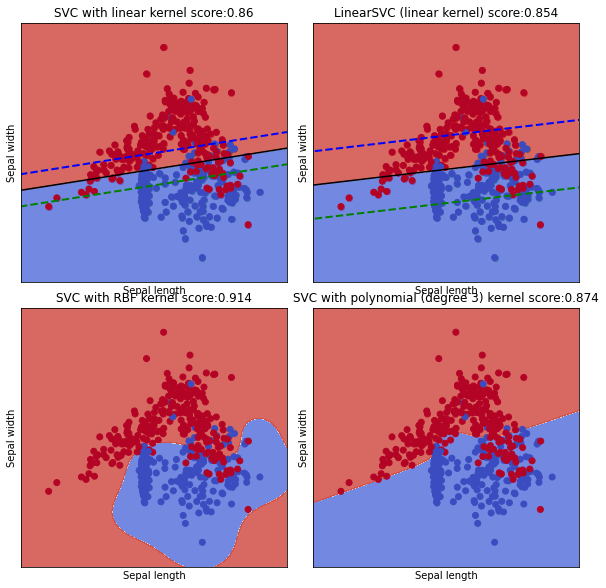

---------------- C = 1------------------


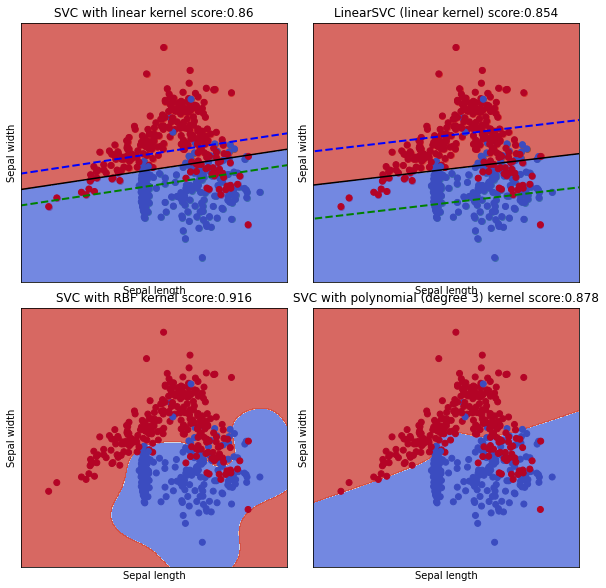

---------------- C = 5------------------


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


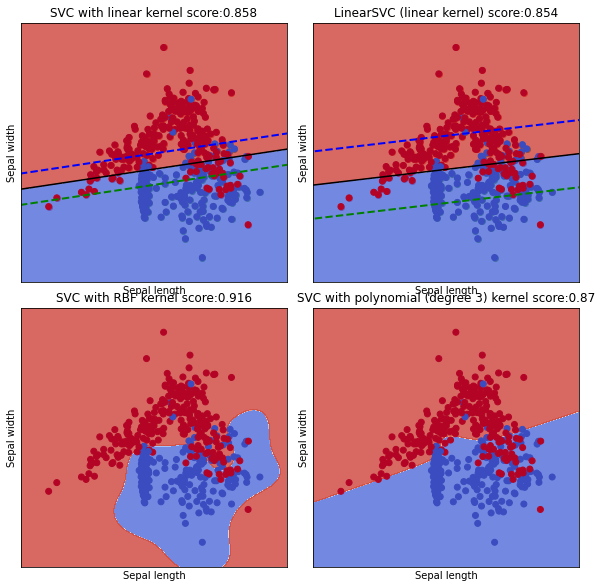

---------------- C = 10------------------


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


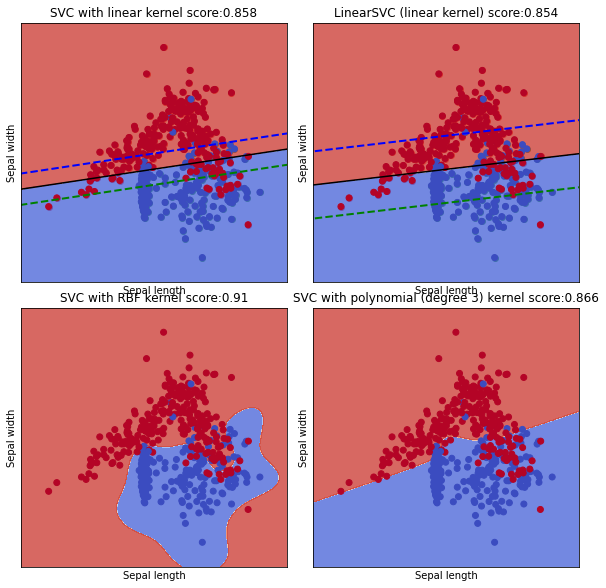

---------------- C = 20------------------


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


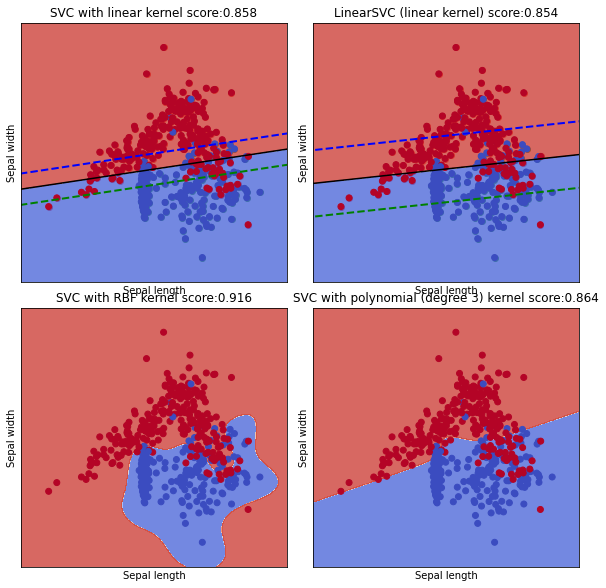

In [17]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

ALLDATA = [[X1,Y1],[X2,Y2],[X3,Y3],[X4,Y4]]

h = .02  # step size in the mesh
cnt = 1
for data in ALLDATA:
  print("################ DataSet {} ###################".format(cnt))
  cnt+=1
  X = data[0][:, :2]
  y = data[1]
  X
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
  # title for the plots
  titles = ['SVC with linear kernel',
            'LinearSVC (linear kernel)',
            'SVC with RBF kernel',
            'SVC with polynomial (degree 3) kernel']
  C = [0.5,1,5,10,20]

  
  for c in C:
    print("---------------- C = {}------------------".format(c))
    svc = svm.SVC(kernel='linear', C=c).fit(X, y)
    rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=c).fit(X, y)
    poly_svc = svm.SVC(kernel='poly', degree=3, C=c).fit(X, y)
    lin_svc = svm.LinearSVC(C=c).fit(X, y)
    plt.figure(figsize=(10, 10))
    for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        score = clf.score(X, y)
        plt.subplot(2, 2, i + 1)
        plt.subplots_adjust(wspace=0.1, hspace=0.1)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)

        if "linear kernel" in titles[i]:
          # plot (margin) for linear kernel:
          w = clf.coef_[0]           # w consists of 2 elements
          b = clf.intercept_[0]      # b consists of 1 element
          x_points = np.linspace(-5, 5) * n_samples # generating x-points from -1 to 1
          y_points = -(w[0] / w[1]) * x_points - b / w[1]  # getting corresponding y-points# Plotting a red hyperplane

          w_hat = clf.coef_[0] / (np.sqrt(np.sum(clf.coef_[0] ** 2)))
          margin = 1 / np.sqrt(np.sum(clf.coef_[0] ** 2))# Step 4 (calculate points of the margin lines):
          decision_boundary_points = np.array(list(zip(x_points, y_points)))
          points_of_line_above = decision_boundary_points + w_hat * margin
          points_of_line_below = decision_boundary_points - w_hat * margin# Plot margin lines# Blue margin line above
          positive,negative = separate_dataset_class(X,y)
          plt.scatter(positive[:, 0], positive[:, 1], c='green', alpha=1)
          plt.scatter(negative[:, 0], negative[:, 1], c='red', alpha=1)
          plt.plot(x_points, y_points, c='black')

          plt.plot(points_of_line_above[:, 0], 
                  points_of_line_above[:, 1], 
                  'b--', 
                  linewidth=2)
          # Green margin line below
          plt.plot(points_of_line_below[:, 0], 
                  points_of_line_below[:, 1], 
                  'g--',
                  linewidth=2)

        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.title("{} score:{}".format(titles[i],score))
    
    plt.show()
    



#SVM Weather Classification 

In [111]:
%cd /content/
%rm -rf *
!wget https://data.mendeley.com/public-files/datasets/4drtyfjtfy/files/a03e6097-f7fb-4e1a-9c6a-8923c6a0d3e0/file_downloaded
%mv file_downloaded weather.zip
!unzip weather.zip
%rm weather.zip


/content
--2022-12-10 09:07:13--  https://data.mendeley.com/public-files/datasets/4drtyfjtfy/files/a03e6097-f7fb-4e1a-9c6a-8923c6a0d3e0/file_downloaded
Resolving data.mendeley.com (data.mendeley.com)... 162.159.130.86, 162.159.133.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.130.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/64a54851-f95a-439d-aff7-3334a684e532 [following]
--2022-12-10 09:07:14--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/64a54851-f95a-439d-aff7-3334a684e532
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 52.92.1.226, 52.218.85.32, 52.218.61.24, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)|52.92.1.2

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
from matplotlib import pyplot
from sklearn import svm

%matplotlib inline

In [2]:
label_dict = {
    "cloudy"  :0,
    "rain"    :1,
    "shine"   :2,
    "sunrise" :3
}

In [3]:
path = glob.glob('/content/dataset2/*.jpg')

#Read Labels and Images
labels = []
images = []
for data in path:
  try:
    img = cv2.imread(data,cv2.IMREAD_GRAYSCALE)
    width, height = 64,64
    img = cv2.resize(img, (width, height),interpolation = cv2.INTER_AREA,)
    
    if "cloudy" in data:
      labels.append(label_dict["cloudy"])
    elif "rain" in data:
      labels.append(label_dict["rain"])
    elif "shine" in data:
      labels.append(label_dict["shine"])
    elif "sunrise" in data:
      labels.append(label_dict["sunrise"])

    images.append(img)
  except:
    print("corrupted image")

images = np.array(images)
labels = np.array(labels)
print(images.shape,labels.shape)

corrupted image
corrupted image
(1120, 64, 64) (1120,)


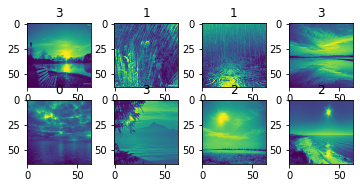

In [4]:
# plot first few images
for i in range(8):
	# define subplot
	pyplot.subplot(340+1 + i)
	# plot raw pixel data
	pyplot.imshow(images[20+i])
	pyplot.title(labels[20+i])
# show the figure
pyplot.show()

In [5]:
data_len = images.shape[0]
data_size = images.shape[1]*images.shape[2]
images = images.flatten().reshape(data_len,data_size)
images.shape

(1120, 4096)

In [6]:
from sklearn.model_selection import train_test_split
# make Train & validation set
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, stratify=labels,
                                                                      random_state= 231,test_size=0.20)
print(train_images.shape, test_images.shape, train_labels.shape, test_labels.shape)

(896, 4096) (224, 4096) (896,) (224,)


rbf Kernel and C=20

In [7]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

num_train = train_images.shape[0]
x_input = train_images[0:num_train:1]
y_input = train_labels[0:num_train:1]
print(x_input.shape,y_input.shape)

print('linear', 'rbf', 'sigmoid', 'poly')

kernel = 'rbf'
c = 20

svm_model = SVC(C=c ,gamma='auto',kernel=kernel)
clf = make_pipeline(StandardScaler(), svm_model)
clf.fit(x_input, y_input)

(896, 4096) (896,)
linear rbf sigmoid poly


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=20, gamma='auto'))])

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        60
           1       0.60      0.74      0.66        34
           2       0.80      0.79      0.80        52
           3       0.82      0.74      0.78        78

    accuracy                           0.71       224
   macro avg       0.70      0.72      0.71       224
weighted avg       0.72      0.71      0.72       224

AxesSubplot(0.125,0.125;0.62x0.755)


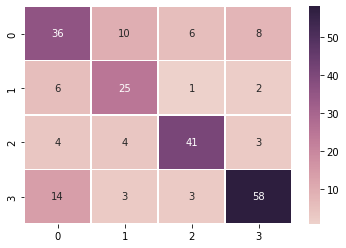

In [8]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn

y_pred = clf.predict(test_images)


report = classification_report(y_pred,test_labels)
print(report)
cmt = confusion_matrix(y_pred,test_labels)
cmt = seaborn.heatmap(cmt,annot=True,fmt='',linewidth=.5,cmap=seaborn.cubehelix_palette(as_cmap=True))
print(cmt)

rbf Kernel and C=1

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

num_train = train_images.shape[0]
x_input = train_images[0:num_train:1]
y_input = train_labels[0:num_train:1]
print(x_input.shape,y_input.shape)

print('linear', 'rbf', 'sigmoid', 'poly')

kernel = 'rbf'
c = 1

svm_model = SVC(C=c ,gamma='auto',kernel=kernel)
clf = make_pipeline(StandardScaler(), svm_model)
clf.fit(x_input, y_input)

(896, 4096) (896,)
linear rbf sigmoid poly


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=1, gamma='auto'))])

              precision    recall  f1-score   support

           0       0.52      0.53      0.53        58
           1       0.62      0.72      0.67        36
           2       0.73      0.74      0.73        50
           3       0.77      0.69      0.73        80

    accuracy                           0.67       224
   macro avg       0.66      0.67      0.66       224
weighted avg       0.67      0.67      0.67       224

AxesSubplot(0.125,0.125;0.62x0.755)


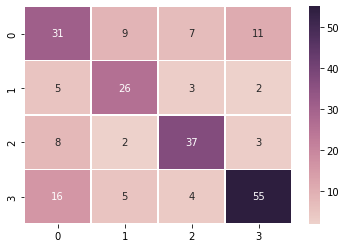

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn

y_pred = clf.predict(test_images)


report = classification_report(y_pred,test_labels)
print(report)
cmt = confusion_matrix(y_pred,test_labels)
cmt = seaborn.heatmap(cmt,annot=True,fmt='',linewidth=.5,cmap=seaborn.cubehelix_palette(as_cmap=True))
print(cmt)

linear Kernel and C=20

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

num_train = train_images.shape[0]
x_input = train_images[0:num_train:1]
y_input = train_labels[0:num_train:1]
print(x_input.shape,y_input.shape)

print('linear', 'rbf', 'sigmoid', 'poly')

kernel = 'linear'
c = 20

svm_model = SVC(C=c ,gamma='auto',kernel=kernel)
clf = make_pipeline(StandardScaler(), svm_model)
clf.fit(x_input, y_input)

(896, 4096) (896,)
linear rbf sigmoid poly


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=20, gamma='auto', kernel='linear'))])

              precision    recall  f1-score   support

           0       0.57      0.51      0.54        67
           1       0.55      0.59      0.57        39
           2       0.69      0.74      0.71        47
           3       0.70      0.70      0.70        71

    accuracy                           0.63       224
   macro avg       0.63      0.64      0.63       224
weighted avg       0.63      0.63      0.63       224

AxesSubplot(0.125,0.125;0.62x0.755)


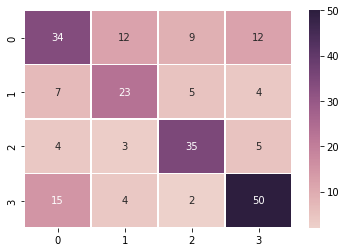

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn

y_pred = clf.predict(test_images)


report = classification_report(y_pred,test_labels)
print(report)
cmt = confusion_matrix(y_pred,test_labels)
cmt = seaborn.heatmap(cmt,annot=True,fmt='',linewidth=.5,cmap=seaborn.cubehelix_palette(as_cmap=True))
print(cmt)

sigmoid Kernel and C=20

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

num_train = train_images.shape[0]
x_input = train_images[0:num_train:1]
y_input = train_labels[0:num_train:1]
print(x_input.shape,y_input.shape)

print('linear', 'rbf', 'sigmoid', 'poly')

kernel = 'sigmoid'
c = 20

svm_model = SVC(C=c ,gamma='auto',kernel=kernel)
clf = make_pipeline(StandardScaler(), svm_model)
clf.fit(x_input, y_input)

(896, 4096) (896,)
linear rbf sigmoid poly


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=20, gamma='auto', kernel='sigmoid'))])

              precision    recall  f1-score   support

           0       0.27      0.32      0.29        50
           1       0.38      0.67      0.48        24
           2       0.71      0.57      0.63        63
           3       0.61      0.49      0.54        87

    accuracy                           0.50       224
   macro avg       0.49      0.51      0.49       224
weighted avg       0.53      0.50      0.51       224

AxesSubplot(0.125,0.125;0.62x0.755)


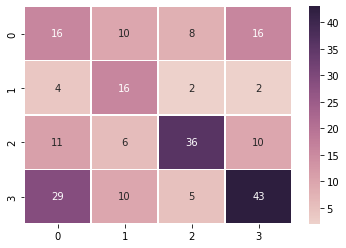

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn

y_pred = clf.predict(test_images)


report = classification_report(y_pred,test_labels)
print(report)
cmt = confusion_matrix(y_pred,test_labels)
cmt = seaborn.heatmap(cmt,annot=True,fmt='',linewidth=.5,cmap=seaborn.cubehelix_palette(as_cmap=True))
print(cmt)

poly Kernel and C=20

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

num_train = train_images.shape[0]
x_input = train_images[0:num_train:1]
y_input = train_labels[0:num_train:1]
print(x_input.shape,y_input.shape)

print('linear', 'rbf', 'sigmoid', 'poly')

kernel = 'poly'
c = 20

svm_model = SVC(C=c ,gamma='auto',kernel=kernel)
clf = make_pipeline(StandardScaler(), svm_model)
clf.fit(x_input, y_input)

(896, 4096) (896,)
linear rbf sigmoid poly


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=20, gamma='auto', kernel='poly'))])

              precision    recall  f1-score   support

           0       0.57      0.44      0.50        77
           1       0.57      0.60      0.59        40
           2       0.59      0.86      0.70        35
           3       0.70      0.69      0.70        72

    accuracy                           0.62       224
   macro avg       0.61      0.65      0.62       224
weighted avg       0.62      0.62      0.61       224

AxesSubplot(0.125,0.125;0.62x0.755)


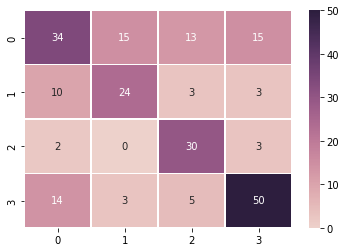

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn

y_pred = clf.predict(test_images)


report = classification_report(y_pred,test_labels)
print(report)
cmt = confusion_matrix(y_pred,test_labels)
cmt = seaborn.heatmap(cmt,annot=True,fmt='',linewidth=.5,cmap=seaborn.cubehelix_palette(as_cmap=True))
print(cmt)